<a href="https://colab.research.google.com/github/vanand102/DataScienceGuidedCapstone/blob/master/Capstone3_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Pre-Processing**

---





**Mounted Google Drive**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Imported Necessary Libraries**

In [2]:
#Import folder
import sys
sys.path.append('/content/drive/MyDrive/Springboard/Capstone 3')

In [3]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from scipy.stats import stats
import os
import numpy as np

# modeling

from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
#

from library.sb_utils import save_file

In [4]:
# the supplied CSV data file is the raw_data directory
diamond_data = pd.read_csv('/content/drive/MyDrive/Springboard/Capstone 3/diamond_data.csv')

In [5]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53920 entries, 0 to 53919
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       53920 non-null  int64  
 1   carat    53920 non-null  float64
 2   cut      53920 non-null  object 
 3   color    53920 non-null  object 
 4   clarity  53920 non-null  object 
 5   depth    53920 non-null  float64
 6   table    53920 non-null  float64
 7   price    53920 non-null  int64  
 8   x        53920 non-null  float64
 9   y        53920 non-null  float64
 10  z        53920 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


**Drop ID column as it is not a key feature for modeling.**

In [6]:
diamond_data = diamond_data.drop(columns=['id'])

**Use the getdummies function on the categorical features in the data in order to create dummy variables.**

In [7]:
categorical_features = ['cut',
                        'color',
                        'clarity']
diamond_data = pd.get_dummies(diamond_data, columns = categorical_features)
print('The data have ', diamond_data.shape[0], ' rows and ', diamond_data.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(diamond_data.columns)))

The data have  53920  rows and  27  columns

column names: 

carat
depth
table
price
x
y
z
cut_Fair
cut_Good
cut_Ideal
cut_Premium
cut_Very Good
color_D
color_E
color_F
color_G
color_H
color_I
color_J
clarity_I1
clarity_IF
clarity_SI1
clarity_SI2
clarity_VS1
clarity_VS2
clarity_VVS1
clarity_VVS2


**Use the standard scalar function on the numerical features in the data in order to scale the data.**

In [8]:
numerical_features = ['carat',
                      'depth',
                      'table',
                      'price',
                      'x',
                      'y',
                      'z']
# Making a Scaler object
scaler = sklearn.preprocessing.StandardScaler()
# Fitting data to the scaler object
scaled_df = scaler.fit_transform(diamond_data[numerical_features])
scaled_df = pd.DataFrame(scaled_df, columns=numerical_features)

In [9]:
scaled_data = diamond_data
scaled_data['carat'] = scaled_df['carat']
scaled_data['depth'] = scaled_df['depth']
scaled_data['table'] = scaled_df['table']
scaled_data['price'] = scaled_df['price']
scaled_data['x'] = scaled_df['x']
scaled_data['y'] = scaled_df['y']
scaled_data['z'] = scaled_df['z']

In [10]:
scaled_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198204,-0.174203,-1.099725,-0.904132,-1.591573,-1.539219,-1.580084,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,-1.240417,-1.361090,1.585988,-0.904132,-1.645173,-1.662014,-1.750896,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.198204,-3.385781,3.376463,-0.903881,-1.502241,-1.460280,-1.750896,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.071566,0.454149,0.243131,-0.902125,-1.368242,-1.319943,-1.295396,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.029353,1.082501,0.243131,-0.901875,-1.243176,-1.214690,-1.124583,0,1,0,...,0,1,0,0,0,1,0,0,0,0


**Create the X and y variables and then split them into test and train data sets.**

In [11]:
X = scaled_data.drop(columns = ['price'])
y = scaled_data['price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 2)
print('Training split has ', X_train.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.',
      '(' + str(len(y_train))+ ')')
print('Test split has ', X_test.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.',
      '(' + str(len(y_test)) + ')')

Training split has  43136  rows
 and the corresponding labels have an equal number of values. (43136)
Test split has  10784  rows
 and the corresponding labels have an equal number of values. (10784)


**Now that the test and train data is ready, we will be moving on to creating models for the data.**

# **Model 1a: Random Forest Regressor - All Features**

***Model Advantages:***

*   Random Forests work well with both categorical and numerical data.
*   Random Forests are not influenced by outliers to a fair degree.
*   Random Forests implicitly perform feature selection and generate uncorrelated decision trees.

***Model Disadvantages:***

*   Random Forests can be computationally intensive for large datasets.
*   Random Forests are not easily interpretable.

***Scoring Method Used:***


*   R-Squared


***Hyperparameters Considered:***

*   max_depth
*   n_estimators
*   criterion



**Grid Search with complexity parameters**

In [13]:
search_space_randomforest = {"max_depth": [5,7,9,12,15,20], "n_estimators": [5,10,15,25]}

In [14]:
Random_Forest = RandomForestRegressor()

In [15]:
cv_sets = ShuffleSplit(3, test_size = 0.20, random_state = 0)

In [16]:
RF_Grid = GridSearchCV(estimator = Random_Forest, param_grid = search_space_randomforest, scoring = 'r2', cv = cv_sets)

In [18]:
RF_Grid = RF_Grid.fit(X_train,y_train)

In [19]:
print(RF_Grid)

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=0, test_size=0.2, train_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 7, 9, 12, 15, 20],
                         'n_estimators': [5, 10, 15, 25]},
             scoring='r2')


**Chart for max_depth**

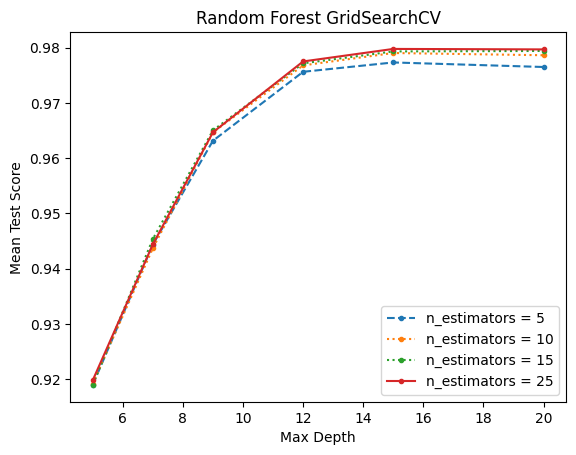

In [20]:
#Turn results into dataframe
RF_Griddf = pd.DataFrame(RF_Grid.cv_results_)

# create data
Max_depth_x = [5,7,9,12,15,20]
Mean_score_5 = RF_Griddf[RF_Griddf["param_n_estimators"] == 5]['mean_test_score']
Mean_score_10 = RF_Griddf[RF_Griddf["param_n_estimators"] == 10]['mean_test_score']
Mean_score_15 = RF_Griddf[RF_Griddf["param_n_estimators"] == 15]['mean_test_score']
Mean_score_25 = RF_Griddf[RF_Griddf["param_n_estimators"] == 25]['mean_test_score']

#plot graph
plt.plot(Max_depth_x,Mean_score_5, label = "n_estimators = 5", ls = '--', marker='.')
plt.plot(Max_depth_x,Mean_score_10, label = "n_estimators = 10", ls = ':', marker='.')
plt.plot(Max_depth_x,Mean_score_15, label = "n_estimators = 15", ls = ':', marker='.')
plt.plot(Max_depth_x,Mean_score_25, label = "n_estimators = 25", ls = '-', marker='.')

plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Random Forest GridSearchCV')
plt.legend()

plt.show()

**A max depth of 9 appears to be the elbow point for the Mean Test Score. Additionally since all the n_estimators have results that are very similar, I chose an n_estimator of 5 to make the model less complex.**

**GridSearch using best complexity parameters for the best criterion.**

In [27]:
search_space_randomforest = {"criterion": ['squared_error','friedman_mse','absolute_error']}

In [28]:
Random_Forest = RandomForestRegressor(max_depth= 9, n_estimators= 5)

In [29]:
RF_Grid = GridSearchCV(estimator = Random_Forest, param_grid = search_space_randomforest, scoring = 'r2', cv = cv_sets)

In [30]:
RF_Grid = RF_Grid.fit(X_train,y_train)

In [31]:
RF_Griddf = pd.DataFrame(RF_Grid.cv_results_)

[Text(0.5, 1.0, 'Mean Score by Criterion')]

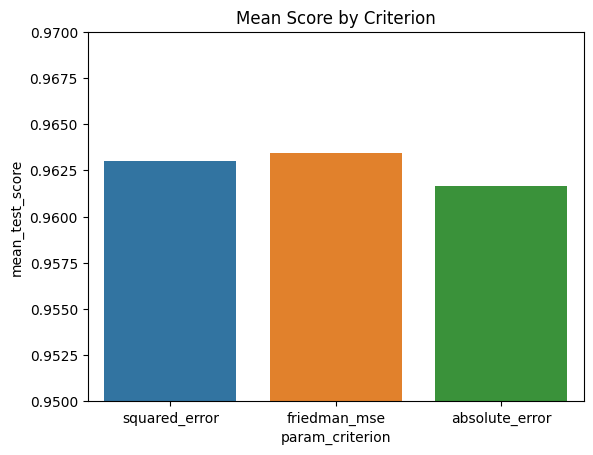

In [32]:
chart = sns.barplot(x = 'param_criterion', y = 'mean_test_score', data = RF_Griddf)
chart.set_ylim(0.95, 0.97)
chart.set(title='Mean Score by Criterion')

**The optimal paramaters for this model are max_depth = 9, n_estimators = 5, and criterion = friedman_mse.**

**Created the final model based on these parameters:**

---



In [33]:
Random_Forest = RandomForestRegressor(max_depth= 9, n_estimators= 5, criterion='friedman_mse')

In [34]:
Random_Forest.fit(X_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=9, n_estimators=5)

In [35]:
print(Random_Forest.score(X_train, y_train))

0.9664064493076867


In [36]:
y_pred = Random_Forest.predict(X_test)

In [37]:
print(Random_Forest.score(X_test, y_test))

0.9625041178340475


Text(0.5, 1.0, 'Q-Q Plot')

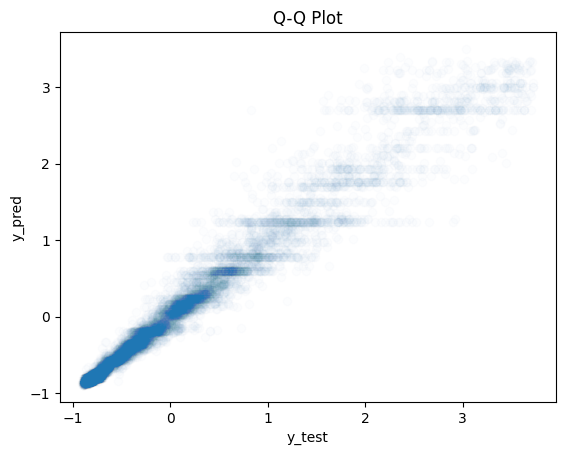

In [38]:
plt.scatter(y_test,y_pred, alpha = 0.01)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Q-Q Plot')

count    10784.000000
mean         0.001217
std          0.191948
min         -1.871820
25%         -0.045446
50%         -0.002169
75%          0.042812
max          1.658933
Name: price, dtype: float64

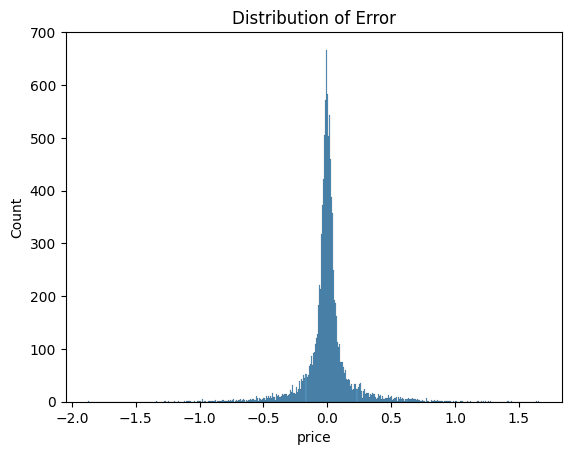

In [39]:
y_diff = y_test - y_pred
chart = sns.histplot(data=y_diff)
chart.set(title='Distribution of Error')
y_diff.describe()

**Results of Model 1a:**

R-Squared Score: 96.25%

Mean Error: 0.0012

Error Standard Deviation: 0.1919

**Table created to show Feature Importance**

26


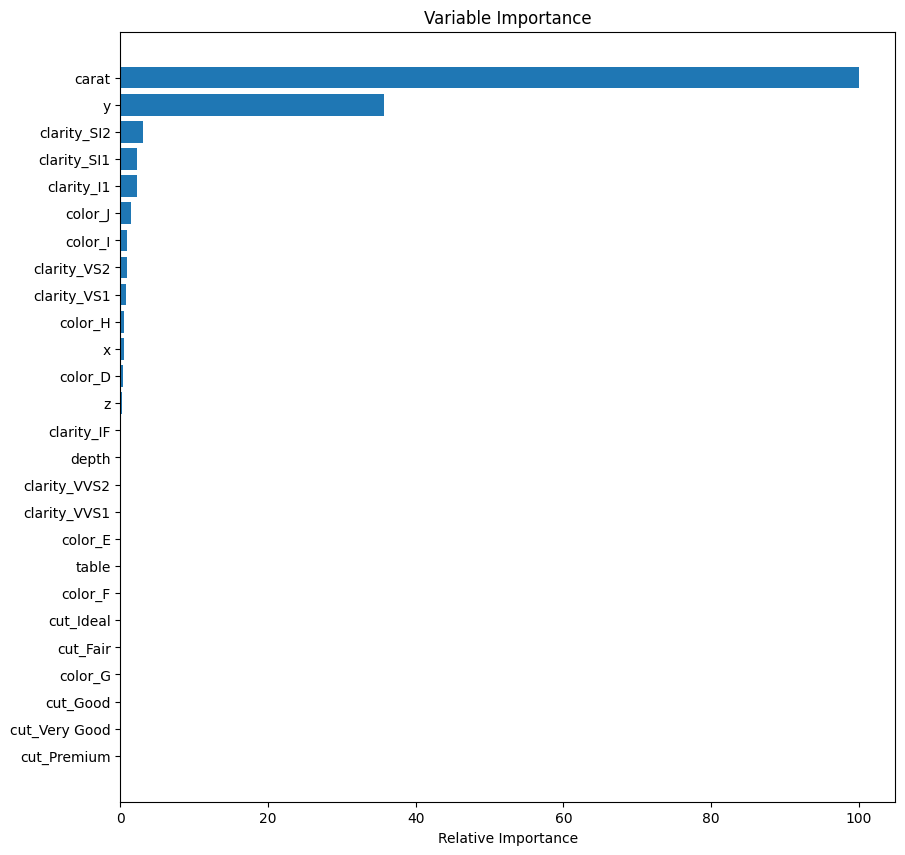

In [40]:
feature_importance = Random_Forest.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

**As the model is giving feature importance to carat, y, color, and clarity, we will create a secondary dataset which keeps those features and remove all other features. Created a secondary test and train dataset for the important features.**

In [41]:
X_2 = scaled_data.drop(columns = ['cut_Ideal','depth','table','z','cut_Fair','cut_Good','cut_Premium','cut_Very Good','x','price'])

In [42]:
y_2 = scaled_data['price']

In [43]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, train_size = 0.80, random_state = 2)
print('Training split has ', X_2_train.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.',
      '(' + str(len(y_2_train))+ ')')
print('Test split has ', X_2_test.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.',
      '(' + str(len(y_2_test)) + ')')

Training split has  43136  rows
 and the corresponding labels have an equal number of values. (43136)
Test split has  10784  rows
 and the corresponding labels have an equal number of values. (10784)


# **Model 1b: Random Forest Regressor based on feature importance**

**Grid Search with complexity parameters**

In [44]:
search_space_randomforest = {"max_depth": [6,8,10,12,15,20], "n_estimators": [5,10,15,25]}

In [45]:
Random_Forest = RandomForestRegressor()

In [46]:
RF_Grid = GridSearchCV(estimator = Random_Forest, param_grid = search_space_randomforest, scoring = 'r2', cv = cv_sets)

In [47]:
RF_Grid = RF_Grid.fit(X_2_train,y_2_train)

**Chart for max_depth**

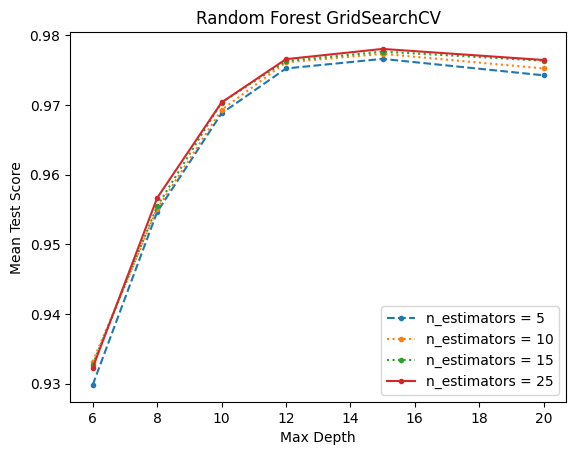

In [48]:
#Turn results into dataframe
RF_Griddf = pd.DataFrame(RF_Grid.cv_results_)

# create data
Max_depth_x = [6,8,10,12,15,20]
Mean_score_5 = RF_Griddf[RF_Griddf["param_n_estimators"] == 5]['mean_test_score']
Mean_score_10 = RF_Griddf[RF_Griddf["param_n_estimators"] == 10]['mean_test_score']
Mean_score_15 = RF_Griddf[RF_Griddf["param_n_estimators"] == 15]['mean_test_score']
Mean_score_25 = RF_Griddf[RF_Griddf["param_n_estimators"] == 25]['mean_test_score']

#plot graph
plt.plot(Max_depth_x,Mean_score_5, label = "n_estimators = 5", ls = '--', marker='.')
plt.plot(Max_depth_x,Mean_score_10, label = "n_estimators = 10", ls = ':', marker='.')
plt.plot(Max_depth_x,Mean_score_15, label = "n_estimators = 15", ls = ':', marker='.')
plt.plot(Max_depth_x,Mean_score_25, label = "n_estimators = 25", ls = '-', marker='.')

plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Random Forest GridSearchCV')
plt.legend()

plt.show()

**A max depth of 10 appears to be the elbow point for the Mean Test Score. Additionally since all the n_estimators have results that are very similar, I cose an n_estimator of 5 to make the model less complex.**

**GridSearch using best complexity parameters for the best criterion.**

In [49]:
search_space_randomforest = {"criterion": ['squared_error','friedman_mse','absolute_error']}

In [50]:
Random_Forest = RandomForestRegressor(max_depth= 10, n_estimators= 5)

In [51]:
RF_Grid = GridSearchCV(estimator = Random_Forest, param_grid = search_space_randomforest, scoring = 'r2', cv = cv_sets)

In [52]:
RF_Grid = RF_Grid.fit(X_2_train,y_2_train)

In [53]:
RF_Griddf = pd.DataFrame(RF_Grid.cv_results_)

[Text(0.5, 1.0, 'Mean Score by Criterion')]

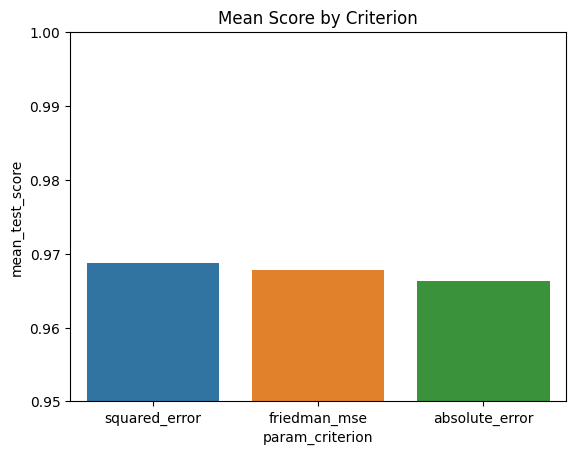

In [54]:
chart = sns.barplot(x = 'param_criterion', y = 'mean_test_score', data = RF_Griddf)
chart.set_ylim(0.95, 1)
chart.set(title='Mean Score by Criterion')

**The optimal paramaters for this model are max_depth = 10, n_estimators = 5, and criterion = squared_error. Created the final model based on these parameters.**

In [55]:
Random_Forest = RandomForestRegressor(max_depth= 10, n_estimators= 5, criterion='squared_error')

In [56]:
Random_Forest.fit(X_2_train,y_2_train)

RandomForestRegressor(max_depth=10, n_estimators=5)

In [57]:
print(Random_Forest.score(X_2_train, y_2_train))

0.9735869159538288


In [58]:
y_2_pred = Random_Forest.predict(X_2_test)

In [59]:
print(Random_Forest.score(X_2_test, y_2_test))

0.9687768294538971


Text(0.5, 1.0, 'Q-Q Plot')

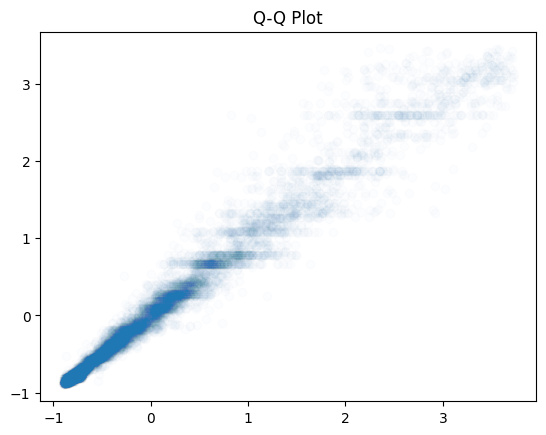

In [60]:
plt.scatter(y_2_test,y_2_pred, alpha = 0.01)
plt.title('Q-Q Plot')

In [61]:
y_2_diff = y_2_test - y_2_pred

count    10784.000000
mean         0.000793
std          0.175160
min         -1.766984
25%         -0.042034
50%         -0.002435
75%          0.042194
max          1.593071
Name: price, dtype: float64

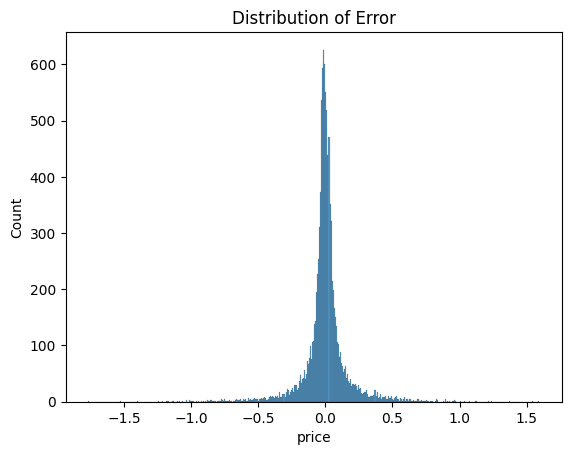

In [62]:
sns.histplot(data=y_2_diff)
plt.title('Distribution of Error')
y_2_diff.describe()

**Results of Model 1b:**

R-Squared Score: 96.88%

Mean Error: 0.0008

Error Standard Deviation: 0.1752

17


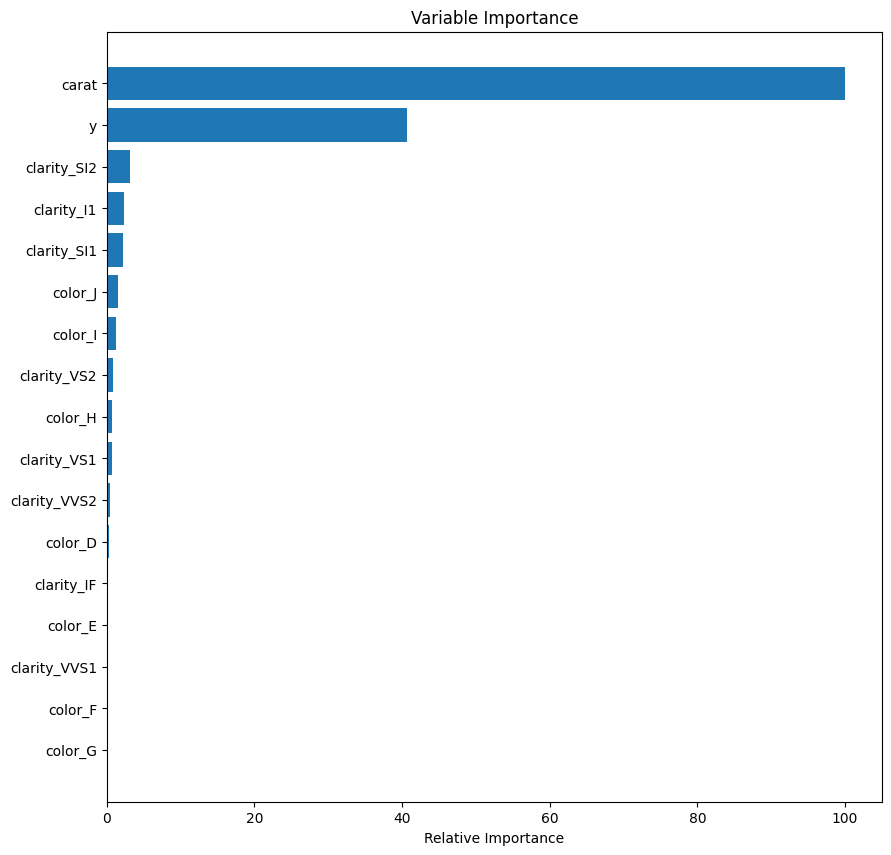

In [63]:
feature_importance = Random_Forest.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# **Model 2a: Decision Tree**

***Model Advantages:***

*   Can be used for classification and regression.
*   Less preparation of data required.
*   Easier to interpret.

***Model Disadvantages:***

*   Decision tree often involves higher time to train the model.
*   Models can become overly complicated and overfitted to the data.

***Scoring Method Used:***

*   R-Squared

***Hyperparameters Considered:***

*   max_depth
*   criterion


**Grid Search with complexity parameters**

In [64]:
search_space_decisiontree = {"max_depth": [4,6,8,10,12,15,20]}

In [65]:
Decision_Tree = DecisionTreeRegressor()

In [66]:
#  Create the grid search object
DT_Grid = GridSearchCV(estimator = Decision_Tree, param_grid = search_space_decisiontree, scoring = 'r2', cv = cv_sets)

# Fit the grid search object to the data to compute the optimal model
DT_Grid = DT_Grid.fit(X_train, y_train)

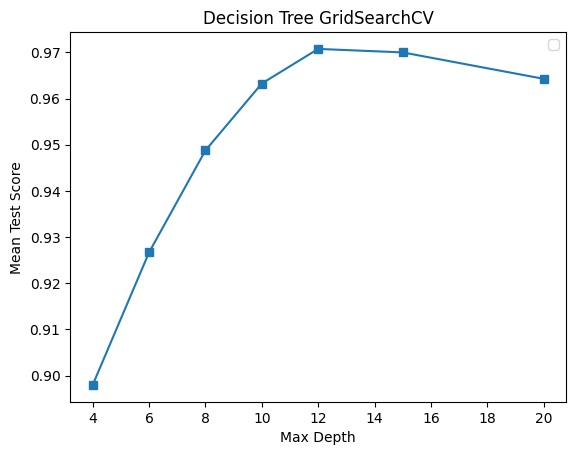

In [67]:
DT_Griddf = pd.DataFrame(DT_Grid.cv_results_)

# create data
Max_depth_x = [4,6,8,10,12,15,20]
Mean_score = DT_Griddf['mean_test_score']

#plot graph
plt.plot(Max_depth_x,Mean_score, ls = '-', marker='s')

plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree GridSearchCV')
plt.legend()

plt.show()

**A max depth of 12 is the elbow point for the Mean Test Score.**

**GridSearch using best complexity parameters for the best criterion.**

In [68]:
search_space_decisiontree = {"criterion": ['squared_error', 'friedman_mse', 'absolute_error']}

In [69]:
Decision_Tree = DecisionTreeRegressor(max_depth = 12)

In [70]:
#  Create the grid search object
DT_Grid = GridSearchCV(estimator = Decision_Tree, param_grid = search_space_decisiontree, scoring = 'r2', cv = cv_sets)

# Fit the grid search object to the data to compute the optimal model
DT_Grid = DT_Grid.fit(X_train, y_train)

In [71]:
DT_Griddf = pd.DataFrame(DT_Grid.cv_results_)

[Text(0.5, 1.0, 'Mean Score by Criterion')]

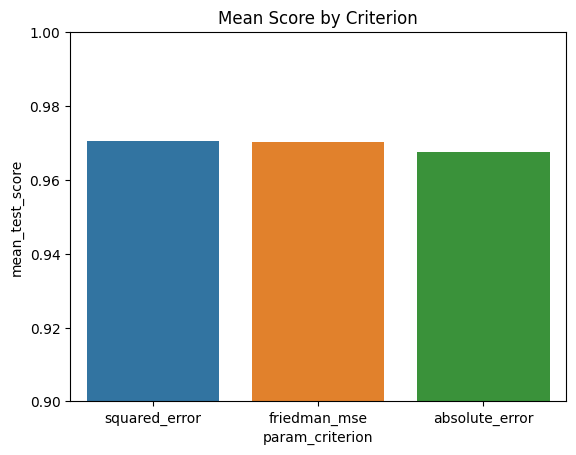

In [72]:
chart = sns.barplot(x = 'param_criterion', y = 'mean_test_score', data = DT_Griddf)
chart.set_ylim(0.9, 1)
chart.set(title='Mean Score by Criterion')

**The optimal paramaters for this model are max_depth = 12 and criterion = squared_error. Created the final model based on these parameters.**

In [73]:
Decision_Tree = DecisionTreeRegressor(max_depth = 12, criterion='squared_error')

In [74]:
Decision_Tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=12)

In [75]:
print(Decision_Tree.score(X_train, y_train))

0.9823632558816856


In [76]:
y_pred = Decision_Tree.predict(X_test)

In [77]:
print(Decision_Tree.score(X_test, y_test))

0.9699573979977721


Text(0.5, 1.0, 'Q-Q Plot')

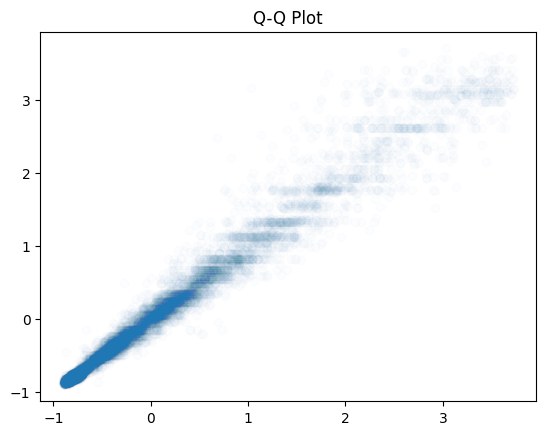

In [78]:
plt.scatter(y_test,y_pred, alpha = 0.01)
plt.title('Q-Q Plot')

In [79]:
y_diff = y_test - y_pred

count    10784.000000
mean        -0.000487
std          0.171817
min         -2.130294
25%         -0.036549
50%         -0.000916
75%          0.038045
max          1.399857
Name: price, dtype: float64

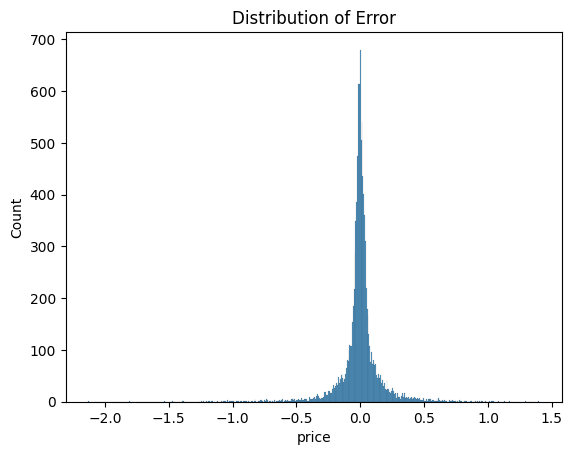

In [80]:
sns.histplot(data=y_diff)
plt.title('Distribution of Error')
y_diff.describe()

**Results of Model 2a:**

R-Squared Score: 96.99%

Mean Error: -0.0005

Error Standard Deviation: 0.1718

**Feature Importance**

26


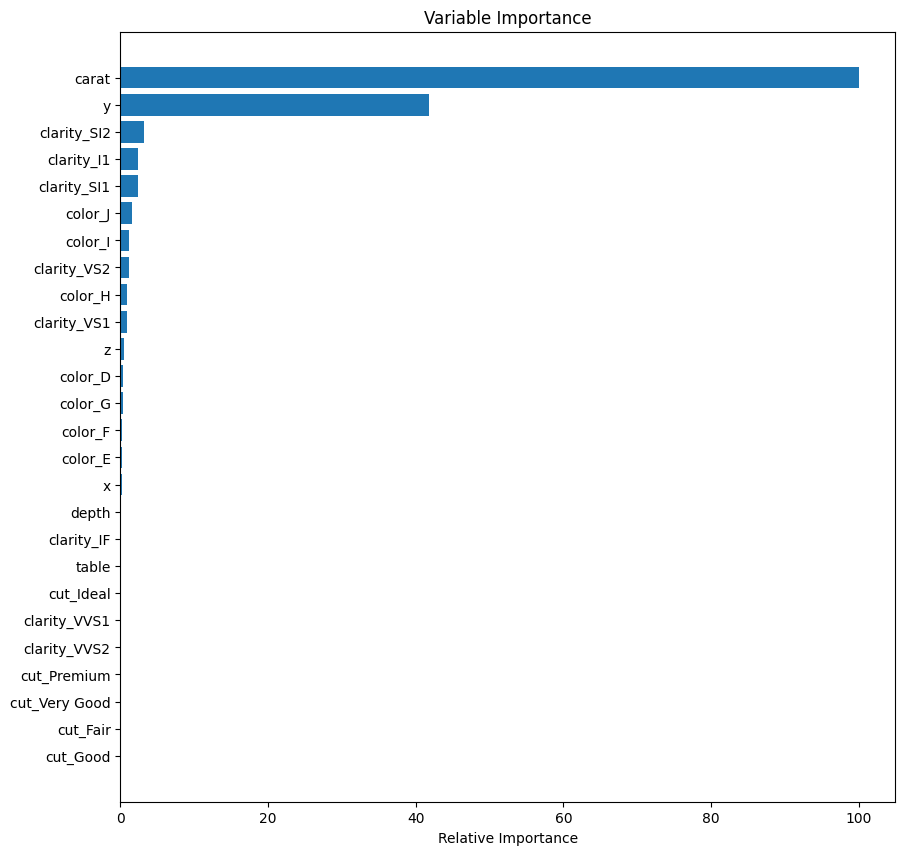

In [81]:
feature_importance = Decision_Tree.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# **Model 2b: Decision Tree Regressor based on feature importance**

**As the model is giving feature importance to carat, y, color, and clarity, similar to the previous model, we will create another model using the updated test/train data sets from the previous model.**

**Grid Search with complexity parameters**

In [82]:
search_space_decisiontree = {"max_depth": [4,6,8,10,12,15,17]}

In [83]:
Decision_Tree = DecisionTreeRegressor()

In [84]:
#  Create the grid search object
DT_Grid = GridSearchCV(estimator = Decision_Tree, param_grid = search_space_decisiontree, scoring = 'r2', cv = cv_sets)

# Fit the grid search object to the data to compute the optimal model
DT_Grid = DT_Grid.fit(X_2_train, y_2_train)

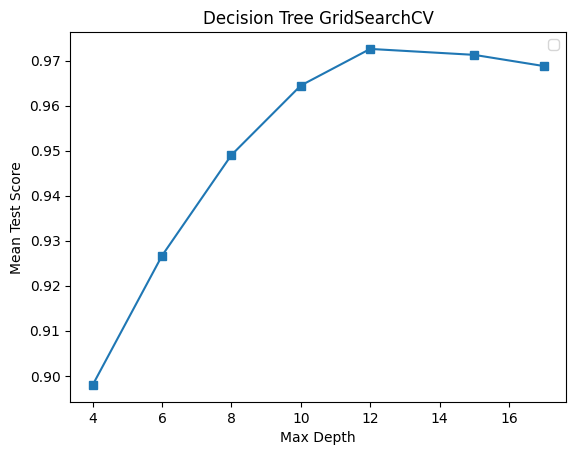

In [85]:
DT_Griddf = pd.DataFrame(DT_Grid.cv_results_)

# create data
Max_depth_x = [4,6,8,10,12,15,17]
Mean_score = DT_Griddf['mean_test_score']

#plot graph
plt.plot(Max_depth_x,Mean_score, ls = '-', marker='s')

plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree GridSearchCV')
plt.legend()

plt.show()

**A max depth of 12 is the elbow point for the Mean Test Score.**

**GridSearch using best complexity parameters for the best criterion.**

In [86]:
search_space_decisiontree = {"criterion": ['squared_error', 'friedman_mse', 'absolute_error']}

In [87]:
Decision_Tree = DecisionTreeRegressor(max_depth = 12)

In [88]:
#  Create the grid search object
DT_Grid = GridSearchCV(estimator = Decision_Tree, param_grid = search_space_decisiontree, scoring = 'r2', cv = cv_sets)

# Fit the grid search object to the data to compute the optimal model
DT_Grid = DT_Grid.fit(X_2_train, y_2_train)

In [89]:
DT_Griddf = pd.DataFrame(DT_Grid.cv_results_)

In [90]:
DT_Griddf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.087258,0.006441,0.003730,0.000016,squared_error,{'criterion': 'squared_error'},0.972954,0.973167,0.971907,0.972676,0.000550,1
1,0.087440,0.006669,0.003961,0.000457,friedman_mse,{'criterion': 'friedman_mse'},0.972720,0.973147,0.971716,0.972528,0.000600,2
2,27.774077,0.853744,0.004396,0.000810,absolute_error,{'criterion': 'absolute_error'},0.966353,0.971325,0.966129,0.967936,0.002398,3


[Text(0.5, 1.0, 'Mean Score by Criterion')]

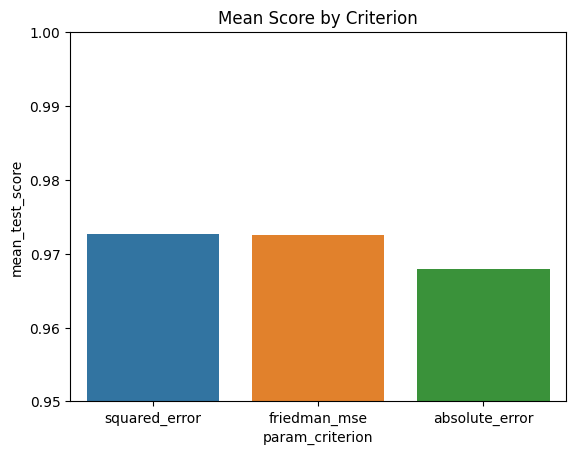

In [91]:
chart = sns.barplot(x = 'param_criterion', y = 'mean_test_score', data = DT_Griddf)
chart.set_ylim(0.95, 1)
chart.set(title='Mean Score by Criterion')

**The optimal paramaters for this model are max_depth = 12 and criterion = squared_error. Created the final model based on these parameters.**

In [92]:
Decision_Tree = DecisionTreeRegressor(max_depth = 12, criterion='squared_error')

In [93]:
Decision_Tree.fit(X_2_train,y_2_train)

DecisionTreeRegressor(max_depth=12)

In [94]:
print(Decision_Tree.score(X_2_train, y_2_train))

0.9815142473248418


In [95]:
y_2_pred = Decision_Tree.predict(X_2_test)

In [96]:
print(Decision_Tree.score(X_2_test, y_2_test))

0.9706673330062189


Text(0.5, 1.0, 'Q-Q Plot')

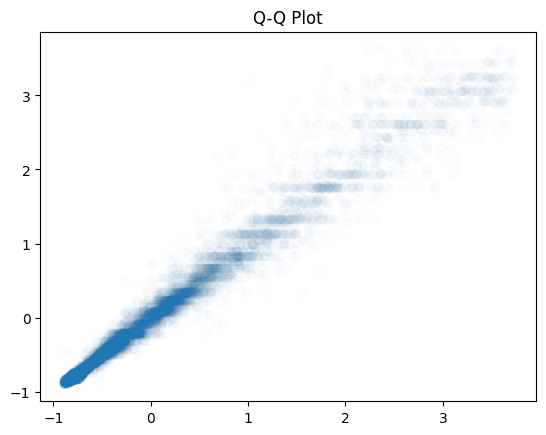

In [97]:
plt.scatter(y_2_test,y_2_pred, alpha = 0.01)
plt.title('Q-Q Plot')

In [98]:
y_2_diff = y_2_test - y_2_pred

count    10784.000000
mean        -0.000459
std          0.169775
min         -2.131297
25%         -0.035454
50%         -0.001592
75%          0.039194
max          1.200328
Name: price, dtype: float64

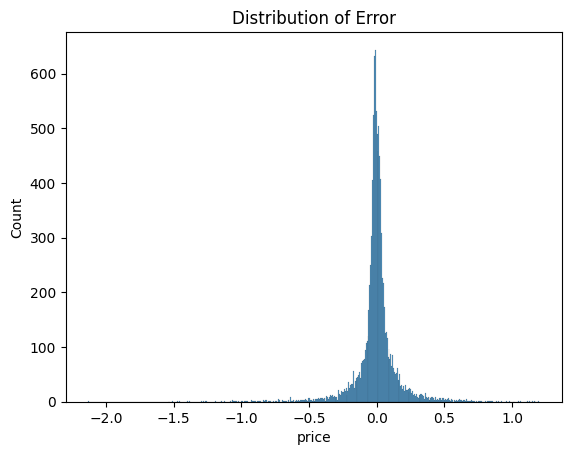

In [99]:
sns.histplot(data=y_2_diff)
plt.title('Distribution of Error')
y_2_diff.describe()

**Results of Model 2b:**

R-Squared Score: 97.07%

Mean Error: -0.0005

Error Standard Deviation: 0.1698

# **Model 3a: Linear Regression - All features**

***Model Advantages:***

*   Linear Regression is a simple model which has a fast speed.
*   This model is easier to interpret.

***Model Disadvantages:***

*   Overly simplistic and doesn't always capture real world complexity.
*   Cannot determine feature Importance.
*   Makes strong assumptions that the features and target variables are linearly related.

***Scoring Method Used:***


*   R-Squared


***Hyperparameters Considered:***

*   N/A


In [100]:
rModel = linear_model.LinearRegression()

In [101]:
rModel.fit(X_train, y_train)

LinearRegression()

**Checked the R-squared score to determine the performance of this model.**

In [102]:
print(rModel.score(X_train, y_train))

0.9195817868107452


In [103]:
y_pred = rModel.predict(X_test)

In [104]:
print(rModel.score(X_test, y_test))

0.9221868412381746


Text(0.5, 1.0, 'Q-Q Plot')

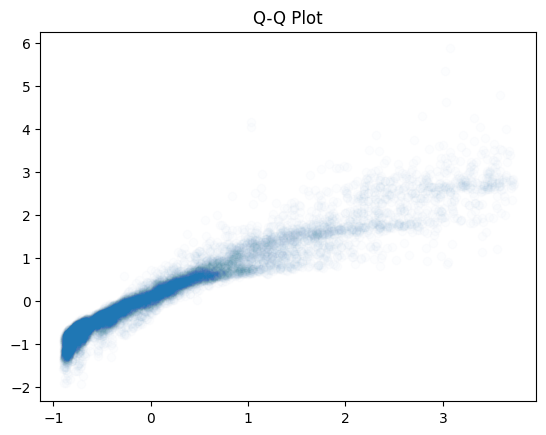

In [105]:
plt.scatter(y_test,y_pred, alpha = 0.01)
plt.title('Q-Q Plot')

In [106]:
y_diff = y_test - y_pred

**Histogram showing the distribution of variances between y_test and y_pred.**

count    10784.000000
mean        -0.002485
std          0.276509
min         -3.133568
25%         -0.147790
50%         -0.049859
75%          0.087837
max          2.354463
Name: price, dtype: float64

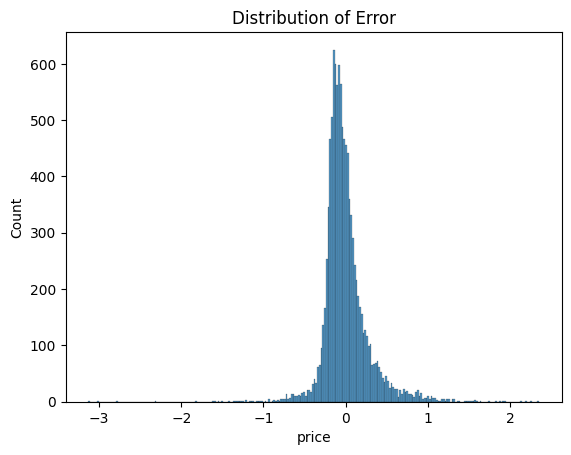

In [107]:
sns.histplot(data=y_diff)
plt.title('Distribution of Error')
y_diff.describe()

**Results of Model 3a:**

R-Squared Score: 92.22%

Mean Error: -0.002

Error Standard Deviation: 0.2765

# **Model 3b: Linear Regression - using limited features**

In [108]:
rModel = linear_model.LinearRegression()

In [109]:
rModel.fit(X_2_train, y_2_train)

LinearRegression()

**Checked the R-squared score to determine the performance of this model.**

In [110]:
print(rModel.score(X_2_train, y_2_train))

0.9147921977737786


In [111]:
y_pred = rModel.predict(X_2_test)

In [112]:
print(rModel.score(X_2_test, y_2_test))

0.9171077332495895


Text(0.5, 1.0, 'Q-Q Plot')

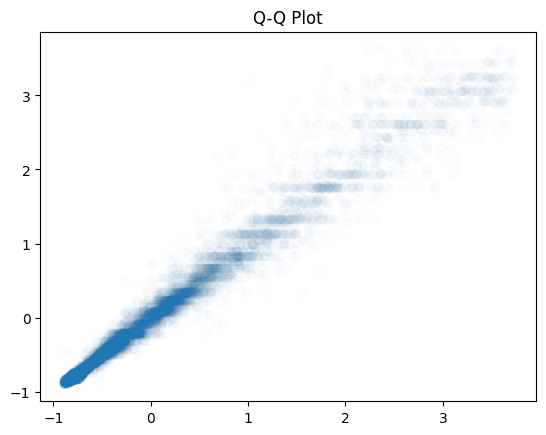

In [113]:
plt.scatter(y_2_test,y_2_pred, alpha = 0.01)
plt.title('Q-Q Plot')

In [114]:
y_2_diff = y_2_test - y_2_pred

**Histogram showing the distribution of variances between y_test and y_pred.**

count    10784.000000
mean        -0.000459
std          0.169775
min         -2.131297
25%         -0.035454
50%         -0.001592
75%          0.039194
max          1.200328
Name: price, dtype: float64

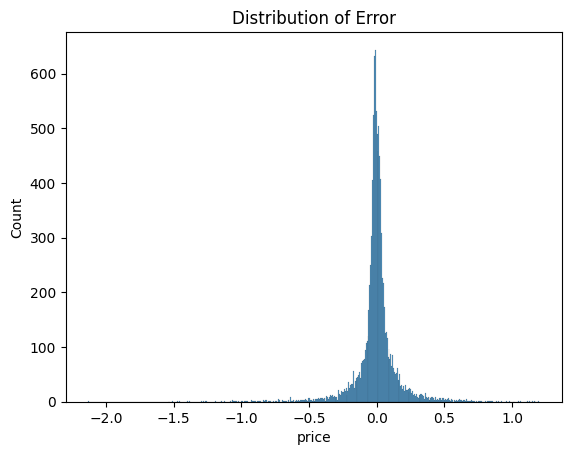

In [115]:
sns.histplot(data=y_2_diff)
plt.title('Distribution of Error')
y_2_diff.describe()

**Results of Model 3b:**

R-Squared Score: 91.71%

Mean Error: -0.0005

Error Standard Deviation: 0.1698

# **Model 4a: Nearest Neighbors Regression**

***Model Advantages:***

*   Simple to understand and implement.
*   Can be used for classification and regression.
*   Has no assumptions.

***Model Disadvantages:***

*   This is a slow algorithm.
*   Requires features to be scaled.
*   Very sensitive to outliers.


***Scoring Method Used:***


*   R-Squared


***Hyperparameters Considered:***

*   n_neighbors
*   p
*   algorithm


**Grid Search with complexity parameters**

In [116]:
search_space_nearestneighbors = {"n_neighbors": [2,5,10,15], "p": [1,2]}

In [117]:
Nearest_Neighbors = KNeighborsRegressor()

In [118]:
NN_Grid = GridSearchCV(estimator = Nearest_Neighbors, param_grid = search_space_nearestneighbors, scoring = 'r2', cv = cv_sets)

In [119]:
NN_Grid = NN_Grid.fit(X_train,y_train)

**Chart for n_neighbors**

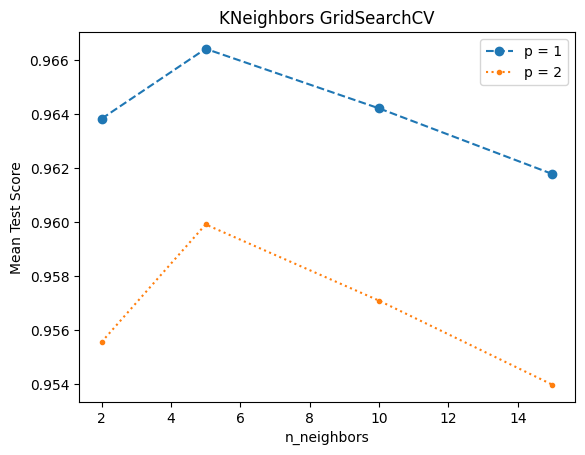

In [120]:
#Turn results into dataframe
NN_Griddf = pd.DataFrame(NN_Grid.cv_results_)

# create data
n_neighbors_x = [2,5,10,15]
P_1 = NN_Griddf[NN_Griddf["param_p"] == 1]['mean_test_score']
P_2 = NN_Griddf[NN_Griddf["param_p"] == 2]['mean_test_score']


#plot graph
plt.plot(n_neighbors_x,P_1, label = "p = 1", ls = '--', marker='o')
plt.plot(n_neighbors_x,P_2, label = "p = 2", ls = ':', marker='.')


plt.xlabel('n_neighbors')
plt.ylabel('Mean Test Score')
plt.title('KNeighbors GridSearchCV')
plt.legend()

plt.show()

**I chose a p value of 1 and n_neighbors of 5 for this model to avoid overfitting.**

**GridSearch using best complexity parameters for the best criterion.**

In [121]:
search_space_NN = {"algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [122]:
Nearest_Neighbors = KNeighborsRegressor(p = 1, n_neighbors=5)

In [123]:
NN_Grid = GridSearchCV(estimator = Nearest_Neighbors, param_grid = search_space_NN, scoring = 'r2', cv = cv_sets)

In [124]:
NN_Grid = NN_Grid.fit(X_train,y_train)

In [125]:
NN_Griddf = pd.DataFrame(NN_Grid.cv_results_)

[Text(0.5, 1.0, 'Mean Score by Criterion')]

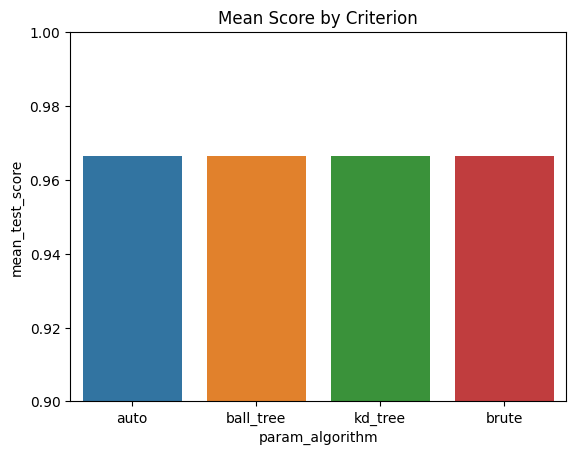

In [126]:
chart = sns.barplot(x = 'param_algorithm', y = 'mean_test_score', data = NN_Griddf)
chart.set_ylim(0.90, 1)
chart.set(title='Mean Score by Criterion')

**As all algorithms performed the same, I'll let the model use the default algorithm ('auto') and specify the optimal hyper parameters, p value of 1 and n_neighbors of 5.**

In [127]:
Nearest_Neighbors = KNeighborsRegressor(p = 1, n_neighbors=5)

In [128]:
Nearest_Neighbors.fit(X_train,y_train)

KNeighborsRegressor(p=1)

In [129]:
print(Nearest_Neighbors.score(X_train, y_train))

0.9800402889184205


In [130]:
y_pred = Nearest_Neighbors.predict(X_test)

In [131]:
print(Nearest_Neighbors.score(X_test, y_test))

0.9681039981527007


Text(0.5, 1.0, 'Q-Q Plot')

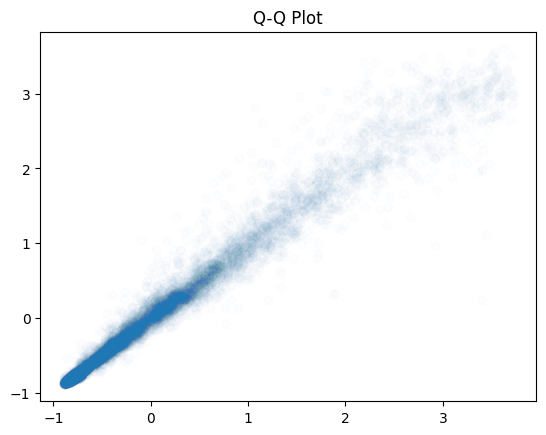

In [132]:
plt.scatter(y_test,y_pred, alpha = 0.01)
plt.title('Q-Q Plot')

In [133]:
y_diff = y_test - y_pred

count    10784.000000
mean         0.004503
std          0.176981
min         -1.748225
25%         -0.035463
50%         -0.000702
75%          0.037269
max          3.161031
Name: price, dtype: float64

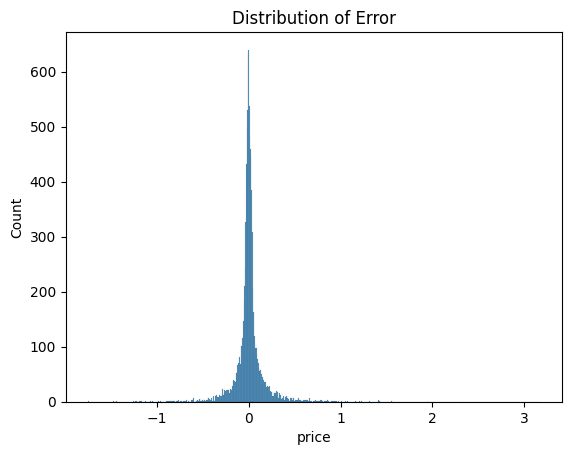

In [134]:
sns.histplot(data=y_diff)
plt.title('Distribution of Error')
y_diff.describe()

**Results of Model 4a:**

R-Squared Score: 96.81%

Mean Error: 0.0045

Error Standard Deviation: 0.177

# **Model 4b: Nearest Neighbors Regression - Including only important features**

**Grid Search with complexity parameters**

In [135]:
search_space_nearestneighbors = {"n_neighbors": [5,10,12,15,20], "p": [1,2]}

In [136]:
Nearest_Neighbors = KNeighborsRegressor()

In [137]:
NN_Grid = GridSearchCV(estimator = Nearest_Neighbors, param_grid = search_space_nearestneighbors, scoring = 'r2', cv = cv_sets)

In [138]:
NN_Grid = NN_Grid.fit(X_2_train,y_2_train)

**Chart for n_neighbors**

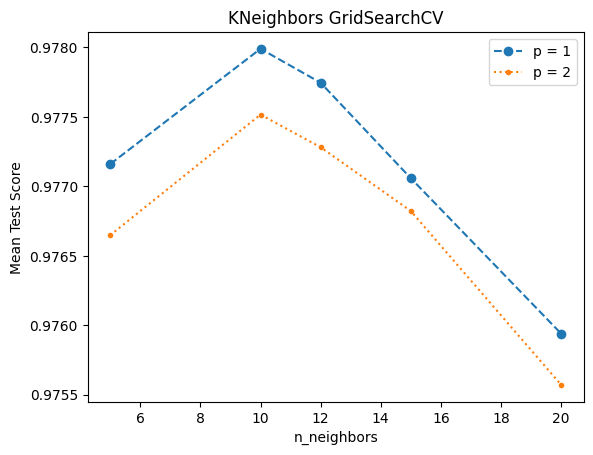

In [139]:
#Turn results into dataframe
NN_Griddf = pd.DataFrame(NN_Grid.cv_results_)

# create data
n_neighbors_x = [5,10,12,15,20]
P_1 = NN_Griddf[NN_Griddf["param_p"] == 1]['mean_test_score']
P_2 = NN_Griddf[NN_Griddf["param_p"] == 2]['mean_test_score']


#plot graph
plt.plot(n_neighbors_x,P_1, label = "p = 1", ls = '--', marker='o')
plt.plot(n_neighbors_x,P_2, label = "p = 2", ls = ':', marker='.')


plt.xlabel('n_neighbors')
plt.ylabel('Mean Test Score')
plt.title('KNeighbors GridSearchCV')
plt.legend()

plt.show()

**I chose a p value of 1 and n_neighbors of 5 for this model to avoid overfitting.**

**GridSearch using best complexity parameters for the best criterion.**

In [140]:
search_space_NN = {"algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [141]:
Nearest_Neighbors = KNeighborsRegressor(p = 1, n_neighbors=5)

In [142]:
NN_Grid = GridSearchCV(estimator = Nearest_Neighbors, param_grid = search_space_NN, scoring = 'r2', cv = cv_sets)

In [143]:
NN_Grid = NN_Grid.fit(X_2_train,y_2_train)

In [144]:
NN_Griddf = pd.DataFrame(NN_Grid.cv_results_)

[Text(0.5, 1.0, 'Mean Score by Criterion')]

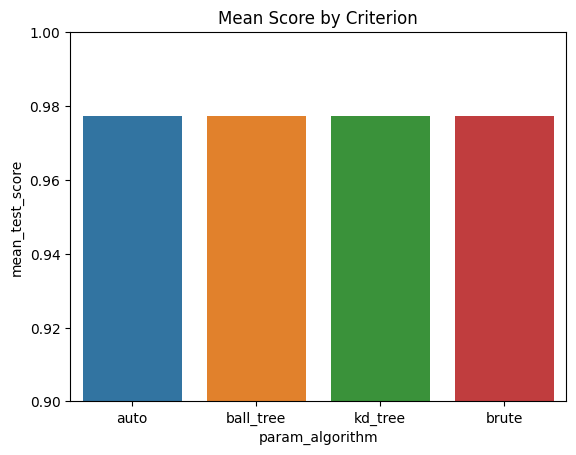

In [145]:
chart = sns.barplot(x = 'param_algorithm', y = 'mean_test_score', data = NN_Griddf)
chart.set_ylim(0.90, 1)
chart.set(title='Mean Score by Criterion')

**As all algorithms performed the same, I'll let the model use the default algorithm and specify the optimal hyper parameters, p value of 1 and n_neighbors of 5.**

In [146]:
Nearest_Neighbors = KNeighborsRegressor(p = 1, n_neighbors=5)

In [147]:
Nearest_Neighbors.fit(X_2_train,y_2_train)

KNeighborsRegressor(p=1)

In [148]:
print(Nearest_Neighbors.score(X_2_train, y_2_train))

0.9855979555606144


In [149]:
y_2_pred = Nearest_Neighbors.predict(X_2_test)

In [150]:
print(Nearest_Neighbors.score(X_2_test, y_2_test))

0.9778410973381325


Text(0.5, 1.0, 'Q-Q Plot')

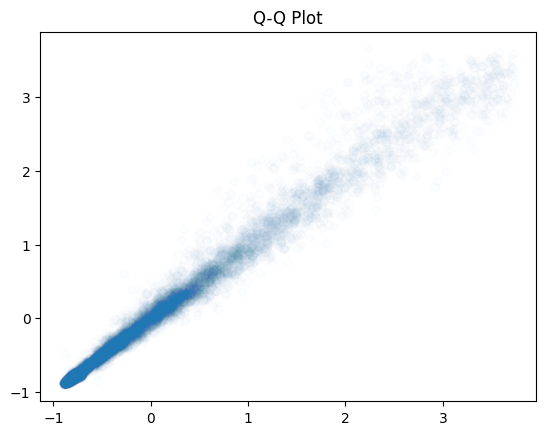

In [151]:
plt.scatter(y_2_test,y_2_pred, alpha = 0.01)
plt.title('Q-Q Plot')

In [152]:
y_2_diff = y_2_test - y_2_pred

count    10784.000000
mean        -0.002408
std          0.147542
min         -1.423740
25%         -0.033858
50%         -0.001605
75%          0.033306
max          1.143296
Name: price, dtype: float64

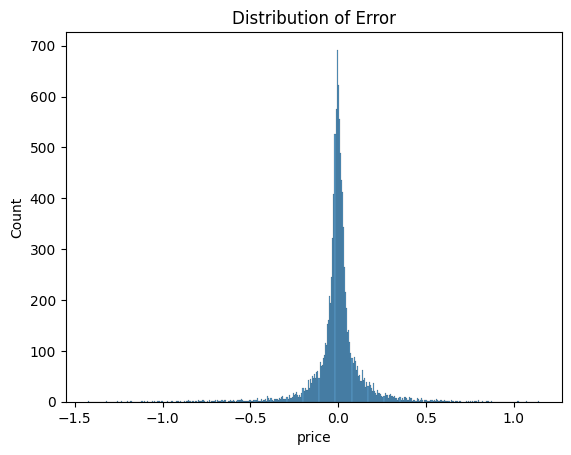

In [153]:
sns.histplot(data=y_2_diff)
plt.title('Distribution of Error')
y_2_diff.describe()

**Results of Model 4b:**

R-Squared Score: 97.78%

Mean Error: -0.0024

Error Standard Deviation: 0.1475

# **Final Model**

**Model Performance Summary:**


*  **Model 1a:** R-Squared Score: 96.31%, Mean Error: 0.0019, Error Standard Deviation: 0.1904
*  **Model 1b:** R-Squared Score: 96.96%, Mean Error: 0.002, Error Standard Deviation: 0.1729
*  **Model 2a:** R-Squared Score: 96.98%, Mean Error: -0.00013, Error Standard Deviation: 0.1723
*  **Model 2b:** R-Squared Score: 97.07%, Mean Error: -0.0006, Error Standard Deviation: 0.1697
*  **Model 3a:** R-Squared Score: 92.22%, Mean Error: -0.002, Error Standard Deviation: 0.2765
*  **Model 3b:** R-Squared Score: 91.71%, Mean Error: -0.0006, Error Standard Deviation: 0.1697
*  **Model 4a:** R-Squared Score: 96.81%, Mean Error: 0.005, Error Standard Deviation: 0.1769
*  **Model 4b:** R-Squared Score: 97.78%, Mean Error: -0.0006, Error Standard Deviation: 0.1697


Based on the performance scores, noted that model 2b is the highest performing model with a score of 97.07, mean error of nearly 0 and a standard deviation of 0.1697.